In [24]:
# Imports

import  numpy as np
from scipy.io import loadmat

from kamitani_data_handler import *

handler = kamitani_data_handler(
    matlab_file='kamitani_data/fmri/Subject3.mat', 
    test_img_csv='kamitani_data/images/image_test_id.csv', 
    train_img_csv='kamitani_data/images/image_training_id.csv',
    log=0 # whether or not to take log of data, 1 before scaling, and 2 after scaling, 0 not at all
    )

handler.get_meta_keys()
handler.print_meta_desc()
print('\n')

train_fmri, test_fmri, test_fmri_avg = handler.get_data(roi='ROI_VC', normalize=1, imag_data=0, test_run_list=None)

print('train_fmri: ', train_fmri.shape)
print('test_fmri: ', test_fmri.shape)
print('test_fmri_avg: ', test_fmri_avg.shape)

['DataType', 'Run', 'Label', 'VoxelData', 'voxel_x', 'voxel_y', 'voxel_z', 'VolInds', 'ROI_V1', 'ROI_V2', 'ROI_V3', 'ROI_V4', 'ROI_LOC', 'ROI_FFA', 'ROI_PPA', 'ROI_LVC', 'ROI_HVC', 'ROI_VC']
['1 = Data type (1 = Training data; 2 = Perception test data; 3 = Imagery test data', '1 = Run number', '1 = Label (image ID)', '1 = Voxel data', 'Voxel x coordinate', 'Voxel y coordinate', 'Voxel z coordinate', '1 = Volume index', '1 = ROI V1', '1 = ROI V2', '1 = ROI V3', '1 = ROI V4', '1 = ROI LOC', '1 = ROI FFA', '1 = ROI PPA', '1 = ROI LVC', '1 = ROI HVC', '1 = ROI VC']


train_fmri:  (1200, 4643)
test_fmri:  (1750, 4643)
test_fmri_avg:  (50, 4643)


(4643,)


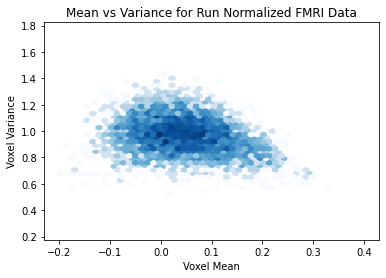

In [32]:
import matplotlib.pyplot as plt

mean = np.mean(train_fmri, axis=0)
print(mean.shape)

var = np.var(train_fmri, axis=0)

plt.hexbin(mean, var, bins='log', gridsize=50, mincnt=1, cmap='Blues', extent=(-0.2, 0.4, 0.25, 1.75))
plt.xlabel('Voxel Mean')
plt.ylabel('Voxel Variance')
plt.title('Mean vs Variance for Run Normalized FMRI Data')
plt.show()